# converting data to normal distribution & Outerlier analysis



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Conversions

In [2]:
#series
#drop(axis=0/1,inplace=True)
#sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
#drop_duplicates(subset=None/['var1','var2'], keep='first/last', inplace=False/True, ignore_index=False/True)
#reset_index(level=None, drop=False/True, inplace=False/true, col_level=0, col_fill='')
#conversions
# DataFrame(data=None/array/list/dict/series, index=None, columns=None, dtype=None, copy=False
# list to Dataframe vise-versa--df.val.tolist(),df.columns.tolist(),df.var.tolist()
#array to Dataframe vise-versa
# DataFrame.to_numpy(dtype=None, copy=False, na_value=<object object>)
# list to array vise-versa--


In [65]:
df=pd.read_csv(r"C:\Paramatma_Pulivarthi\Data_Science_course\recipeData.csv",encoding='latin-1')

In [4]:
# df.head()
#drop(axis=0/1,inplace=True)

In [4]:
#drop the observatios [2,5,8,9]

In [6]:
df_filter=df[5:]

In [7]:
df_filter

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN,5889.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,...,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116.0
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,...,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116.0
9,10,Mango Habanero IPA,/homebrew/recipe/view/61082/mango-habanero-ipa,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,...,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,73857,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,36,21.00,1.052,1.012,5.22,39.73,...,1.060,63.0,3.0,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,59658.0
73857,73858,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,151,10.00,1.059,1.010,6.37,59.21,...,1.034,60.0,NaN,Specific Gravity,BIAB,0.50,22.00,NaN,NaN,NaN
73858,73859,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,111,16.00,1.046,1.008,5.01,25.42,...,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,17.00,sucrose,140 g,82450.0
73859,73860,Flata Rødkløver,/homebrew/recipe/view/603788/,Irish Red Ale,92,24.00,1.051,1.014,4.82,25.65,...,1.043,72.0,NaN,Specific Gravity,All Grain,NaN,18.00,Sukkerlake,5 g sukker/l,NaN


In [8]:
df_obs=df.drop([2,5,8,9],axis=0)

In [10]:
df_obs.head(11)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,...,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116.0
10,11,Bakke Brygg HveteIPA 25 L,/homebrew/recipe/view/73890/bakke-brygg-hvetei...,American IPA,7,25.00,1.064,1.014,6.63,64.26,...,1.055,74.0,NaN,Specific Gravity,All Grain,1.00,18.00,Sukkerlake,6 5 g sukker/L,18325.0
11,12,Hop Notch Clone,/homebrew/recipe/view/10092/hop-notch-clone,American IPA,7,15.14,1.066,1.015,6.62,111.00,...,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN,NaN
12,13,Racer 5 IPA Clone,/homebrew/recipe/view/23246/racer-5-ipa-clone,American IPA,7,20.82,1.073,1.019,7.07,69.72,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
13,14,Sam Adams Rebel IPA Clone,/homebrew/recipe/view/106996/sam-adams-rebel-i...,American IPA,7,18.93,1.066,1.017,6.51,60.96,...,1.110,30.0,NaN,Specific Gravity,extract,0.35,18.33,NaN,NaN,23595.0


In [5]:
df.shape

(73861, 23)

In [5]:
# drop these columns ['Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG']

In [11]:
df_rcol=df.drop(['Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG'],axis=1)

In [13]:
df.head(5)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [14]:
df_rcol.head(5)

,BeerID,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [15]:
dfn=df

In [16]:
dfn.drop(['Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG'],axis=1,inplace=True)

In [18]:
dfn.head()

,BeerID,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [6]:
# consider the columns ['Name', 'URL', 'Style', 'StyleID']

In [21]:
dfs=df[['Name', 'URL', 'Style', 'StyleID']]

In [ ]:
#sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

In [25]:
# dfs.Style.value_counts()

In [7]:
#sort Style columns in ascending order
#sort Style columns in make missing values in first posting

In [29]:
df_stylosort=dfs.sort_values(by=['Style'],na_position='first')

In [31]:
df_stylosort=dfs.sort_values(by=['Style'],ascending=False)

In [32]:
df_stylosort

,Name,URL,Style,StyleID
22071,RIS Barrel project 2016,/homebrew/recipe/view/403639/ris-barrel-projec...,Wood-Aged Beer,176
52804,Reds Red,/homebrew/recipe/view/545208/reds-red,Wood-Aged Beer,176
9453,Fist Full of Tequila,/homebrew/recipe/view/241382/fist-full-of-tequila,Wood-Aged Beer,176
922,Peat & Oak,/homebrew/recipe/view/38965/peat-oak,Wood-Aged Beer,176
3580,SchuBrew BBQ Project,/homebrew/recipe/view/187685/schubrew-bbq-project,Wood-Aged Beer,176
...,...,...,...,...
73413,Summer saison,/homebrew/recipe/view/617449/summer-saison,NaN,111
73600,Cara Red,/homebrew/recipe/view/614632/cara-red,NaN,111
73634,Wit Easter Beer,/homebrew/recipe/view/611645/wit-easter-beer,NaN,111
73700,Chinook the Crook,/homebrew/recipe/view/615888/chinook-the-crook,NaN,111


In [8]:
#remove the duplicates in "Name" column
#keep the last observations

In [ ]:
#drop_duplicates(subset=None/['var1','var2'], keep='first/last', inplace=False/True, ignore_index=False/True)

In [33]:
dfdup=df

In [34]:
dfdup.shape

(73861, 23)

In [47]:
dfdup.drop_duplicates(subset=['Style'],keep='first',inplace=True)

In [48]:
dfdup.shape

(176, 23)

In [ ]:
df_dropcol=drop()
df_dropcol_sor=df_dropcol.sort_values()
df_dropcol_sor_dup=df_dropcol_sor.drop_duplicates()


In [40]:
dfdup_rndup.shape

(176, 23)

In [46]:
dfdup_rndup.sort_values(by='Style')

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
246,247,#56 Ringwood Romance,/homebrew/recipe/view/140909/-56-ringwood-romance,Altbier,1,9.46,1.055,1.015,5.23,21.66,...,1.046,35.0,NaN,Specific Gravity,extract,0.75,23.33,NaN,NaN,NaN
1981,1982,Dutch Kuyt,/homebrew/recipe/view/318705/dutch-kuyt,Alternative Grain Beer,2,11.36,1.043,1.011,4.24,27.80,...,1.026,70.0,NaN,Specific Gravity,All Grain,0.50,16.67,NaN,NaN,NaN
4268,4269,"Kümmel (Caraway Liqueur) ""Brewers""",/homebrew/recipe/view/306192/,Alternative Sugar Beer,3,2.84,1.184,1.035,19.56,0.00,...,1.184,35.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,42159.0
48,49,Nugget Nectar Clone,/homebrew/recipe/view/189197/nugget-nectar-clone,American Amber Ale,4,18.93,1.075,1.009,7.50,0.00,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
509,510,American Barley Wine,/homebrew/recipe/view/11296/american-barley-wine,American Barleywine,5,22.71,1.110,1.022,11.58,146.28,...,NaN,74.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1734,Raspberry sour,/homebrew/recipe/view/307411/raspberry-sour,Wild Specialty Beer,173,6.81,1.058,1.011,6.09,12.82,...,1.035,70.0,NaN,Specific Gravity,BIAB,0.75,20.00,NaN,NaN,NaN
139,140,Great Lakes Christmas Ale Clone,/homebrew/recipe/view/282437/great-lakes-chris...,Winter Seasonal Beer,174,22.71,1.072,1.017,7.31,28.98,...,1.053,70.0,NaN,Specific Gravity,BIAB,0.35,21.11,NaN,NaN,39433.0
50,51,Kronenbourg Blanc clone (Été dans un verre...,/homebrew/recipe/view/182011/,Witbier,175,18.93,1.051,1.012,5.22,18.67,...,1.035,68.0,1.25,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,13114.0
150,151,Kentucky Bourbon Barrel Ale,/homebrew/recipe/view/74737/kentucky-bourbon-b...,Wood-Aged Beer,176,18.93,1.099,1.033,8.62,20.79,...,1.082,70.0,1.25,Specific Gravity,All Grain,NaN,20.00,priming sugar,7 ozs,NaN


In [49]:
dfdup_rndup

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN,5889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,7174,Uff-da Clone-ish,/homebrew/recipe/view/312770/uff-da-clone-ish,Dunkles Bock,60,20.82,1.065,1.018,6.45,28.58,...,1.048,75.0,NaN,Specific Gravity,BIAB,1.50,8.89,NaN,NaN,10483.0
7507,7508,Kottbusser,/homebrew/recipe/view/312933/kottbusser,German Leichtbier,79,21.77,1.054,1.013,5.40,32.16,...,1.044,65.0,1.75,Specific Gravity,All Grain,0.75,17.22,NaN,NaN,8496.0
7716,7717,Scotch Ale 90 Shilling,/homebrew/recipe/view/347779/scotch-ale-90-shi...,Scottish Light,140,18.93,1.109,1.032,10.05,30.68,...,1.084,70.0,1.25,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,NaN
7879,7880,1871 Porter,/homebrew/recipe/view/414675/1871-porter,Pre-Prohibition Porter,126,22.71,1.049,1.012,4.88,28.71,...,1.039,73.0,1.50,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,39583.0


In [41]:
df.sort_values(by='Style')

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
45708,45709,Rhine River Altbier,/homebrew/recipe/view/438268/rhine-river-altbier,Altbier,1,18.93,1.050,1.010,5.34,52.65,...,1.043,68.0,1.25,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
38728,38729,Son of an ALTered Beast,/homebrew/recipe/view/452011/son-of-an-altered...,Altbier,1,20.82,1.050,1.016,4.47,40.15,...,1.042,68.0,1.25,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
10507,10508,AltBier,/homebrew/recipe/view/307150/altbier,Altbier,1,18.93,1.052,1.012,5.19,96.83,...,1.037,70.0,1.50,Specific Gravity,All Grain,NaN,20.00,NaN,NaN,603.0
37081,37082,Alt Dusseldorf,/homebrew/recipe/view/372046/alt-dusseldorf,Altbier,1,28.39,1.052,1.012,5.30,42.03,...,1.041,70.0,1.60,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
69732,69733,JZ Cowboy Alt,/homebrew/recipe/view/601105/jz-cowboy-alt,Altbier,1,22.00,1.051,1.012,5.13,41.36,...,1.042,70.0,2.50,Specific Gravity,All Grain,1.25,16.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73413,73414,Summer saison,/homebrew/recipe/view/617449/summer-saison,NaN,111,18.93,1.064,1.019,5.84,31.69,...,1.106,35.0,NaN,Specific Gravity,extract,NaN,20.00,NaN,NaN,130414.0
73600,73601,Cara Red,/homebrew/recipe/view/614632/cara-red,NaN,111,22.71,1.046,1.010,4.61,68.81,...,1.037,70.0,1.50,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,53199.0
73634,73635,Wit Easter Beer,/homebrew/recipe/view/611645/wit-easter-beer,NaN,111,21.00,1.025,1.006,2.52,7.43,...,1.018,35.0,NaN,Specific Gravity,BIAB,NaN,20.00,NaN,NaN,NaN
73700,73701,Chinook the Crook,/homebrew/recipe/view/615888/chinook-the-crook,NaN,111,20.82,1.055,1.010,5.90,68.19,...,1.043,75.0,1.50,Specific Gravity,All Grain,0.50,22.22,NaN,NaN,NaN


In [9]:
#reset index
#drop index columns
#reset index in same data frame

In [ ]:
#reset_index(level=None, drop=False/True, inplace=False/true, col_level=0, col_fill='')

In [53]:
dff=df

In [57]:
# dfdup_rndup.shape
df_reset_ind=dfdup_rndup.reset_index()

In [59]:
df_reset_ind_n=dfdup_rndup.reset_index(drop=True)

In [61]:
dfdup_rndup.reset_index(inplace=True)

In [62]:
dfdup_rndup

,index,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
4,5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,...,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN,5889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,7173,7174,Uff-da Clone-ish,/homebrew/recipe/view/312770/uff-da-clone-ish,Dunkles Bock,60,20.82,1.065,1.018,6.45,...,1.048,75.0,NaN,Specific Gravity,BIAB,1.50,8.89,NaN,NaN,10483.0
172,7507,7508,Kottbusser,/homebrew/recipe/view/312933/kottbusser,German Leichtbier,79,21.77,1.054,1.013,5.40,...,1.044,65.0,1.75,Specific Gravity,All Grain,0.75,17.22,NaN,NaN,8496.0
173,7716,7717,Scotch Ale 90 Shilling,/homebrew/recipe/view/347779/scotch-ale-90-shi...,Scottish Light,140,18.93,1.109,1.032,10.05,...,1.084,70.0,1.25,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,NaN
174,7879,7880,1871 Porter,/homebrew/recipe/view/414675/1871-porter,Pre-Prohibition Porter,126,22.71,1.049,1.012,4.88,...,1.039,73.0,1.50,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,39583.0


In [60]:
df_reset_ind_n

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
4,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN,5889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,7174,Uff-da Clone-ish,/homebrew/recipe/view/312770/uff-da-clone-ish,Dunkles Bock,60,20.82,1.065,1.018,6.45,28.58,...,1.048,75.0,NaN,Specific Gravity,BIAB,1.50,8.89,NaN,NaN,10483.0
172,7508,Kottbusser,/homebrew/recipe/view/312933/kottbusser,German Leichtbier,79,21.77,1.054,1.013,5.40,32.16,...,1.044,65.0,1.75,Specific Gravity,All Grain,0.75,17.22,NaN,NaN,8496.0
173,7717,Scotch Ale 90 Shilling,/homebrew/recipe/view/347779/scotch-ale-90-shi...,Scottish Light,140,18.93,1.109,1.032,10.05,30.68,...,1.084,70.0,1.25,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,NaN
174,7880,1871 Porter,/homebrew/recipe/view/414675/1871-porter,Pre-Prohibition Porter,126,22.71,1.049,1.012,4.88,28.71,...,1.039,73.0,1.50,Specific Gravity,All Grain,0.75,20.00,NaN,NaN,39583.0


In [10]:
# dfn=pd.read_csv(r"C:\Users\ppulivarthi\AV_Hackthons\Janathahack_HR_Analytics\train_jqd04QH.csv")

# Identifying Missing values

In [11]:
#isnull(),isna,notna()

In [12]:
# syntax:
# pd.isnull(obj)
# df.isnull()


In [68]:
df.head(5)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [67]:
df.isnull()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
73857,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
73858,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
73859,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True


In [69]:
df.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [13]:
# df=pd.read_csv(r"C:\Users\ppulivarthi\AV_Hackthons\Janathahack_HR_Analytics\train_jqd04QH.csv")

In [14]:
# df=pd.read_csv(r"C:\Paramatma_Pulivarthi\Data_Science_course\recipeData.csv",encoding='latin-1')

# Imputation of missing values or Replacing missing values

In [15]:
# syntax:
# fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)
# intepolate()
# asfreq()
#sklearn. SimpleImputer(*, missing_values=nan, strategy='mean/median/most_frequent/constant', fill_value=None, verbose=0, copy=True, add_indicator=False)
# fit_transform(df)
# transform(df)

In [16]:
#find all missing columns values
#Generate the no.of row is missing in each columns


In [75]:
df.isnull().sum()


BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [76]:
df.isna().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [77]:
df.notna()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,True,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,True,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,True
73857,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,False,False,False
73858,True,True,True,False,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
73859,True,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,True,False


In [78]:
df.notna().sum()

BeerID           73861
Name             73860
URL              73861
Style            73265
StyleID          73861
Size(L)          73861
OG               73861
FG               73861
ABV              73861
IBU              73861
Color            73861
BoilSize         73861
BoilTime         73861
BoilGravity      70871
Efficiency       73861
MashThickness    43997
SugarScale       73861
BrewMethod       73861
PitchRate        34609
PrimaryTemp      51199
PrimingMethod     6766
PrimingAmount     4774
UserId           23371
dtype: int64

In [17]:
#calculate the percentage of missing values & remove more than 40% missing values

In [83]:
df_missing=pd.DataFrame(df.isnull().sum(),columns=["missing_data"])

In [85]:
df_missing['Total_rec']=df.shape[0]

In [92]:
df_missing['per']=round(((df_missing.missing_data/df_missing.Total_rec)*100),1)

In [93]:
df_missing

,missing_data,Total_rec,per
BeerID,0,73861,0.0
Name,1,73861,0.0
URL,0,73861,0.0
Style,596,73861,0.8
StyleID,0,73861,0.0
Size(L),0,73861,0.0
OG,0,73861,0.0
FG,0,73861,0.0
ABV,0,73861,0.0
IBU,0,73861,0.0


In [18]:
#replace missing values with 0
# ['BoilGravity','MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount','UserId','Style']

In [94]:
df_miss=df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount','UserId','Style']]

In [97]:
# df_miss.columns
df_miss.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,NaN,NaN,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.070,NaN,NaN,NaN,NaN,NaN,955.0,Holiday/Winter Special Spiced Beer
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American IPA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American IPA
4,1.050,NaN,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale


In [ ]:
# fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)

In [99]:
df_miss.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,NaN,NaN,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.070,NaN,NaN,NaN,NaN,NaN,955.0,Holiday/Winter Special Spiced Beer
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American IPA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American IPA
4,1.050,NaN,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale


In [103]:
# df_miss.fillna(0)
# df_miss_l=df_miss.fillna(0,limit=4)
# 
df_miss_l.head(10)

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,0.0,0.0,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.070,0.0,0.0,0.00,0,0,955.0,Holiday/Winter Special Spiced Beer
2,0.000,0.0,0.0,0.00,0,0,0.0,American IPA
3,0.000,0.0,0.0,0.00,0,0,0.0,American IPA
4,1.050,NaN,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale
5,1.047,NaN,1.0,0.00,0,0,5889.0,American Pale Ale
6,0.000,NaN,NaN,NaN,NaN,NaN,1051.0,Imperial IPA
7,1.040,1.4,NaN,NaN,corn sugar,4.2 oz,116.0,Cream Ale
8,1.042,NaN,NaN,NaN,corn sugar,4 oz,116.0,Robust Porter
9,1.058,NaN,NaN,21.11,Corn Sugar,4.6 oz / .66 C,0.0,Imperial IPA


In [19]:
#replace missing values with ' '

In [106]:
df_mis_space=df_miss.fillna(' ')

In [107]:
df_mis_space

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,,,17.78,corn sugar,4.5 oz,116,Cream Ale
1,1.07,,,,,,955,Holiday/Winter Special Spiced Beer
2,,,,,,,,American IPA
3,,,,,,,,American IPA
4,1.05,,,19,Sukkerlake,6-7 g sukker/l,18325,Belgian Blond Ale
...,...,...,...,...,...,...,...,...
73856,1.06,3,1.25,20,,,59658,British Strong Ale
73857,1.034,,0.5,22,,,,Specialty IPA: Rye IPA
73858,1.041,,0.35,17,sucrose,140 g,82450,
73859,1.043,,,18,Sukkerlake,5 g sukker/l,,Irish Red Ale


In [20]:
#replace missing values with preceding value

In [108]:
df_mis_ffill=df_miss.fillna(method='ffill')

In [109]:
df_mis_ffill

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,NaN,NaN,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.070,NaN,NaN,17.78,corn sugar,4.5 oz,955.0,Holiday/Winter Special Spiced Beer
2,1.070,NaN,NaN,17.78,corn sugar,4.5 oz,955.0,American IPA
3,1.070,NaN,NaN,17.78,corn sugar,4.5 oz,955.0,American IPA
4,1.050,NaN,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale
...,...,...,...,...,...,...,...,...
73856,1.060,3.0,1.25,20.00,Corn Sugar,70 grams,59658.0,British Strong Ale
73857,1.034,3.0,0.50,22.00,Corn Sugar,70 grams,59658.0,Specialty IPA: Rye IPA
73858,1.041,3.0,0.35,17.00,sucrose,140 g,82450.0,Specialty IPA: Rye IPA
73859,1.043,3.0,0.35,18.00,Sukkerlake,5 g sukker/l,82450.0,Irish Red Ale


In [21]:
#replace missing values with succeeding value

In [110]:
df_mis_bfill=df_miss.fillna(method='backfill')

In [111]:
df_mis_bfill

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,1.4,1.00,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.070,1.4,1.00,19.00,Sukkerlake,6-7 g sukker/l,955.0,Holiday/Winter Special Spiced Beer
2,1.050,1.4,1.00,19.00,Sukkerlake,6-7 g sukker/l,18325.0,American IPA
3,1.050,1.4,1.00,19.00,Sukkerlake,6-7 g sukker/l,18325.0,American IPA
4,1.050,1.4,1.00,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale
...,...,...,...,...,...,...,...,...
73856,1.060,3.0,1.25,20.00,sucrose,140 g,59658.0,British Strong Ale
73857,1.034,NaN,0.50,22.00,sucrose,140 g,82450.0,Specialty IPA: Rye IPA
73858,1.041,NaN,0.35,17.00,sucrose,140 g,82450.0,Irish Red Ale
73859,1.043,NaN,NaN,18.00,Sukkerlake,5 g sukker/l,NaN,Irish Red Ale


In [22]:
# replace columns with BoilGravity=1.9,MashThickness=4,Style=other

In [112]:
dic={"BoilGravity" : "1.9" ,"MashThickness" : "4","Style" :"other"}

In [113]:
df_mis_dic=df_miss.fillna(value=dic)

In [114]:
df_mis_dic

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,4,NaN,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.07,4,NaN,NaN,NaN,NaN,955.0,Holiday/Winter Special Spiced Beer
2,1.9,4,NaN,NaN,NaN,NaN,NaN,American IPA
3,1.9,4,NaN,NaN,NaN,NaN,NaN,American IPA
4,1.05,4,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale
...,...,...,...,...,...,...,...,...
73856,1.06,3,1.25,20.00,NaN,NaN,59658.0,British Strong Ale
73857,1.034,4,0.50,22.00,NaN,NaN,NaN,Specialty IPA: Rye IPA
73858,1.041,4,0.35,17.00,sucrose,140 g,82450.0,other
73859,1.043,4,NaN,18.00,Sukkerlake,5 g sukker/l,NaN,Irish Red Ale


# Missing Values imputation with sklearn

In [2]:
# # installing and checking the library details
# pip install -U scikit-learn
# python -m pip show scikit-learn # to see which version and where scikit-learn is installed
# python -m pip freeze # to see all packages installed in the active virtualenv
# python -c "import sklearn; sklearn.show_versions()"


In [ ]:
!pip install -U scikit-learn

In [3]:
#sklearn. SimpleImputer(*, missing_values=''/nan, strategy='mean/median/most_frequent/constant', fill_value=None, verbose=0, copy=True, add_indicator=False)

In [4]:
#fit_transform & transform

In [21]:
df_train=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\SimpleImputer_example.xlsx",sheet_name="Train")
df_test=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\SimpleImputer_example.xlsx",sheet_name="Test")

In [23]:
print("***********train dataset details********* \n",df_train.describe(),"\n \t******test dataset details**** \n \t",df_test.describe())

***********train dataset details********* 
             sales
count  208.000000
mean    51.994136
std     23.557247
min      0.714622
25%     34.751563
50%     52.300263
75%     69.104032
max     96.556250 
 	******test dataset details**** 
 	             sales
count  114.000000
mean    26.775892
std     15.349193
min      0.125015
25%     17.901914
50%     25.961274
75%     33.326920
max     85.301215


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F15E1ACC0>]],
      dtype=object)

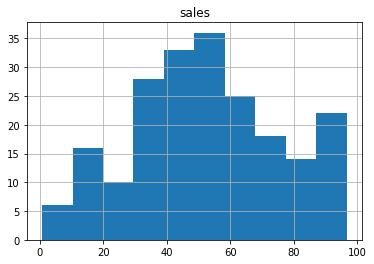

In [24]:
df_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F17E87198>]],
      dtype=object)

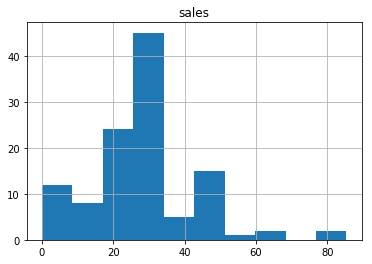

In [25]:
df_test.hist()

In [7]:

#sklearn. SimpleImputer(*, missing_values=''/nan, strategy='mean/median/most_frequent/constant', fill_value=None, verbose=0, copy=True, add_indicator=False)

In [8]:
#replace missing values with Mean value
#  ['BoilGravity','MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount','UserId','Style']

In [26]:
df=pd.read_csv(r"C:\Paramatma_Pulivarthi\Data_Science_course\recipeData.csv",encoding='latin-1')

In [27]:
df_mis=df[ ['BoilGravity','MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount','UserId','Style']]

In [28]:
df_mis.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId,Style
0,1.038,NaN,NaN,17.78,corn sugar,4.5 oz,116.0,Cream Ale
1,1.070,NaN,NaN,NaN,NaN,NaN,955.0,Holiday/Winter Special Spiced Beer
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American IPA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American IPA
4,1.050,NaN,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0,Belgian Blond Ale


In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [32]:
df_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BoilGravity    70871 non-null  float64
 1   MashThickness  43997 non-null  float64
 2   PitchRate      34609 non-null  float64
 3   PrimaryTemp    51199 non-null  float64
 4   PrimingMethod  6766 non-null   object 
 5   PrimingAmount  4774 non-null   object 
 6   UserId         23371 non-null  float64
 7   Style          73265 non-null  object 
dtypes: float64(5), object(3)
memory usage: 4.5+ MB


In [33]:
df_num=df_mis.select_dtypes(exclude='object')

In [34]:
df_char=df_mis.select_dtypes(include='object')

In [37]:
# df_num.head()
# df_char.head()

In [40]:
imp_mean=pd.DataFrame(imp.fit_transform(df_num))

In [42]:
imp_mean.columns=df_num.columns

In [44]:
imp_mean.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,UserId
0,1.038000,2.127235,0.750468,17.780000,116.000000
1,1.070000,2.127235,0.750468,19.175641,955.000000
2,1.353955,2.127235,0.750468,19.175641,43078.069188
3,1.353955,2.127235,0.750468,19.175641,43078.069188
4,1.050000,2.127235,0.750468,19.000000,18325.000000


In [45]:
df_num.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,UserId
0,1.038,NaN,NaN,17.78,116.0
1,1.070,NaN,NaN,NaN,955.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,1.050,NaN,NaN,19.00,18325.0


In [10]:
#replace missing values with Median value

In [46]:
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')

In [47]:
imp_median1=pd.DataFrame(imp_median.fit_transform(df_num))

In [49]:
# imp_median1=pd.DataFrame(imp_median.fit_transform(df_num))
imp_median1.columns=df_num.columns

In [50]:
imp_median1.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,UserId
0,1.038,1.5,0.75,17.78,116.0
1,1.070,1.5,0.75,20.00,955.0
2,1.047,1.5,0.75,20.00,42897.0
3,1.047,1.5,0.75,20.00,42897.0
4,1.050,1.5,0.75,19.00,18325.0


In [51]:
imp_mean.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,UserId
0,1.038000,2.127235,0.750468,17.780000,116.000000
1,1.070000,2.127235,0.750468,19.175641,955.000000
2,1.353955,2.127235,0.750468,19.175641,43078.069188
3,1.353955,2.127235,0.750468,19.175641,43078.069188
4,1.050000,2.127235,0.750468,19.000000,18325.000000


In [11]:
#replace missing values with Mode value

In [54]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [55]:
imp_mode1=pd.DataFrame(imp_mode.fit_transform(df_num))
imp_mode1.columns=df_num.columns

In [56]:
imp_mode1.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,UserId
0,1.038,1.5,0.35,17.78,116.0
1,1.070,1.5,0.35,20.00,955.0
2,1.044,1.5,0.35,20.00,34210.0
3,1.044,1.5,0.35,20.00,34210.0
4,1.050,1.5,0.35,19.00,18325.0


In [57]:
imp_mean.head()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,UserId
0,1.038000,2.127235,0.750468,17.780000,116.000000
1,1.070000,2.127235,0.750468,19.175641,955.000000
2,1.353955,2.127235,0.750468,19.175641,43078.069188
3,1.353955,2.127235,0.750468,19.175641,43078.069188
4,1.050000,2.127235,0.750468,19.000000,18325.000000


In [12]:
#replace missing values with constant value

In [58]:
df_char.head()

,PrimingMethod,PrimingAmount,Style
0,corn sugar,4.5 oz,Cream Ale
1,NaN,NaN,Holiday/Winter Special Spiced Beer
2,NaN,NaN,American IPA
3,NaN,NaN,American IPA
4,Sukkerlake,6-7 g sukker/l,Belgian Blond Ale


In [74]:
imp_const=SimpleImputer(missing_values='corn sugar', strategy='constant', fill_value='other')

In [75]:
imp_costant=pd.DataFrame(imp_const.fit_transform(df_char))
imp_costant.columns=df_char.columns

ValueError: Input contains NaN

In [69]:
imp_costant.head()

,PrimingMethod,PrimingAmount,Style
0,corn sugar,4.5 oz,Cream Ale
1,other,other,Holiday/Winter Special Spiced Beer
2,other,other,American IPA
3,other,other,American IPA
4,Sukkerlake,6-7 g sukker/l,Belgian Blond Ale


# Conversions List<->DataFrame<->Array

In [13]:
# List to DataFrame
#conversions
# DataFrame(data=None/array/list/dict/series, index=None, columns=None, dtype=None, copy=False
# list to Dataframe vise-versa--df.val.tolist(),df.columns.tolist(),df.var.tolist()
#array to Dataframe vise-versa
# DataFrame.to_numpy(dtype=None, copy=False, na_value=<object object>)
# list to array vise-versa--


In [14]:
# DataFrame(data=None/array/list/dict/series, index=None, columns=None, dtype=None, copy=False

In [15]:
# list to Dataframe vise-versa--df.val.tolist(),df.columns.tolist(),df.var.tolist()

In [77]:
# df.head()

In [78]:
lst_all=df.values.tolist()

In [80]:
# lst_all

In [81]:
lst_columns=df.columns.tolist()

In [82]:
lst_columns

['BeerID',
 'Name',
 'URL',
 'Style',
 'StyleID',
 'Size(L)',
 'OG',
 'FG',
 'ABV',
 'IBU',
 'Color',
 'BoilSize',
 'BoilTime',
 'BoilGravity',
 'Efficiency',
 'MashThickness',
 'SugarScale',
 'BrewMethod',
 'PitchRate',
 'PrimaryTemp',
 'PrimingMethod',
 'PrimingAmount',
 'UserId']

In [83]:

lst_col_var=df.Color.tolist()

In [85]:
# lst_col_var


In [86]:
#convert the list as dataframe product column
products=["Product-A","Product-B","Product-C","Product-D","Product-E","Product-F"]

In [87]:
products

['Product-A', 'Product-B', 'Product-C', 'Product-D', 'Product-E', 'Product-F']

In [90]:
df_list_var=pd.DataFrame(products,columns=["products"])

In [92]:
df_list_var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   products  6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [95]:
#convert the list as dataframe product & sales columns
products=[["Product-A",120],["Product-B",140],["Product-C",160],["Product-D",165],["Product-E",290],["Product-F",210]]

[['Product-A', 120],
 ['Product-B', 140],
 ['Product-C', 160],
 ['Product-D', 165],
 ['Product-E', 290],
 ['Product-F', 210]]

In [97]:
pro=[["p1","p2","p3"],[1,2,3]]

In [98]:
pro

[['p1', 'p2', 'p3'], [1, 2, 3]]

In [101]:
df_list_tdim=pd.DataFrame(products,columns=["product","sale"])

In [102]:
df_list_tdim

,product,sale
0,Product-A,120
1,Product-B,140
2,Product-C,160
3,Product-D,165
4,Product-E,290
5,Product-F,210


In [18]:
# DataFrame.to_numpy(dtype=None, copy=False, na_value=<object object>)

In [103]:
array_onedim=np.array([1,2,3,4,5])

In [104]:
array_onedim

array([1, 2, 3, 4, 5])

In [107]:
df_onedimarr=pd.DataFrame(array_onedim,columns=["sales"])

In [108]:
df_onedimarr

,sales
0,1
1,2
2,3
3,4
4,5


In [110]:
array_onedim=np.array([[1,2,3,4,5],[10,20,30,40,50]])

In [114]:
array_onedim=np.array([["product-A",120],["product-b",234]])

In [115]:
df_to_arr=pd.DataFrame(array_onedim)

In [116]:
df_to_arr

,0,1
0,product-A,120
1,product-b,234


In [111]:
array_onedim

array([[ 1,  2,  3,  4,  5],
       [10, 20, 30, 40, 50]])

In [112]:
df_to_arr=pd.DataFrame(array_onedim)

In [113]:
df_to_arr

,0,1,2,3,4
0,1,2,3,4,5
1,10,20,30,40,50


In [118]:
# df.head()

In [119]:
one_arr=df.OG.to_numpy()

In [120]:
one_arr

array([1.055, 1.083, 1.063, ..., 1.046, 1.051, 1.06 ])

In [121]:
products

[['Product-A', 120],
 ['Product-B', 140],
 ['Product-C', 160],
 ['Product-D', 165],
 ['Product-E', 290],
 ['Product-F', 210]]

In [ ]:
# list ot arrays

In [122]:
products=["Product-A","Product-B","Product-C","Product-D","Product-E","Product-F"]

In [125]:
# arr_list=to_numpy(products)

NameError: name 'to_numpy' is not defined